## Ring-hydroxylating Dioxygenases

In [1]:
from protlearn import *

[nltk_data] Downloading package punkt to /Users/lucas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lucas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/lucas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Create data frame from raw data and clean it
msa_file = 'alignment.fasta'
msa = MSA()
msa.parse_msa_file(msa_file)
print(msa.raw_data.info)

<bound method DataFrame.info of                          0    1    2    3    4    5    6    7    8    9      
A0A1V1ZE67_9FLAO/178-361    -    -    -    -    -    -    -    -    -    -  \
A0A0J1DCU0_9BURK/170-416    -    -    -    -    -    -    -    -    -    -   
J2WKD9_9SPHN/182-387        -    -    -    -    -    -    -    -    -    -   
A0A1Q3AVG0_CEPFO/233-414    -    -    -    -    -    -    -    -    -    -   
A0A5N0VGT3_9PSEU/179-385    -    -    -    -    -    -    -    -    -    -   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
A0A109D4U5_9BURK/167-435    -    -    -    -    -    -    -    -    -    -   
Q63MU4_BURPS/184-418        -    -    -    -    -    -    -    -    -    -   
A0A1M7PUQ5_9ACTN/175-372    -    -    -    -    -    -    -    -    -    -   
A0A4Q4THZ6_9PEZI/248-366    -    -    -    -    -    -    -    -    -    -   
A0A318HGY1_9BURK/191-426    -    -    -    -    -    -    -    -    -    -   

                          ... 1

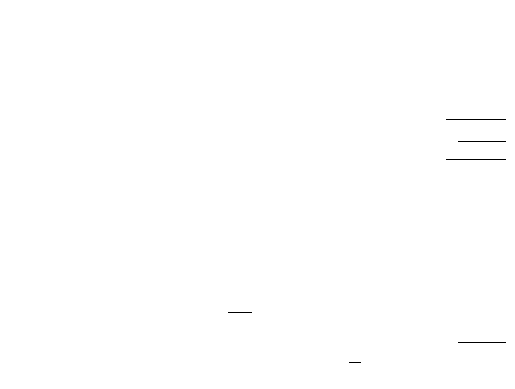

<bound method DataFrame.info of      182 185 186 187 200 204 205 206 216 217  ... 838 841 845 848 851 853 982   
0      A   L   Y   C   E   G   F   H   V   H  ...   T   Y   V   Y   D   E   E  \
1      K   L   Y   M   D   P   Y   H   L   H  ...   Y   F   G   Y   E   D   D   
2      K   L   T   Y   E   N   Y   H   I   H  ...   L   Y   W   K   G   E   E   
3      K   V   F   C   D   G   Y   H   A   H  ...   Y   F   L   E   G   S   E   
4      K   V   V   N   E   C   Y   H   N   H  ...   W   F   V   A   D   A   Q   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
7562   K   L   M   Q   D   P   Y   H   L   H  ...   H   F   G   F   E   E   D   
7564   K   M   Y   L   D   T   V   H   T   H  ...   S   F   R   A   A   G   D   
7565   K   L   T   M   E   C   Y   H   N   H  ...   W   L   V   H   R   D   Q   
7566   K   L   V   V   D   F   Y   H   V   H  ...   V   F   V   D   N   S   Q   
7567   K   L   T   M   E   C   Y   H   N   H  ...   W   C   V   H   R   D   Q

In [3]:
msa.cleanse_data(plot=True)
print(msa.data.info)

In [4]:
msa.analyse(plot=True)
msa.reduce()
print(msa.coordinates.shape)

(6469, 2)


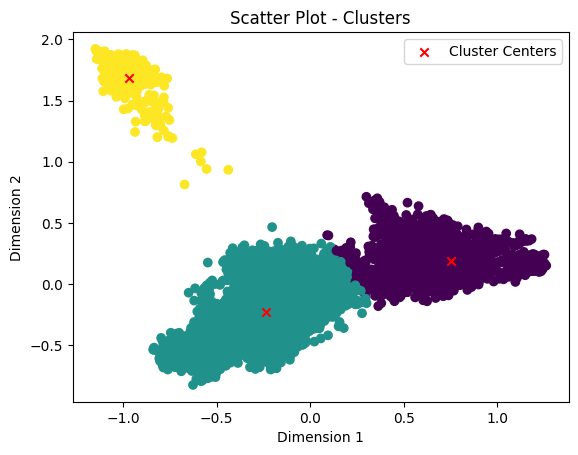

[1 0 1 ... 1 1 1]


In [5]:
msa.get_labels(plot=True)
print(msa.labels)

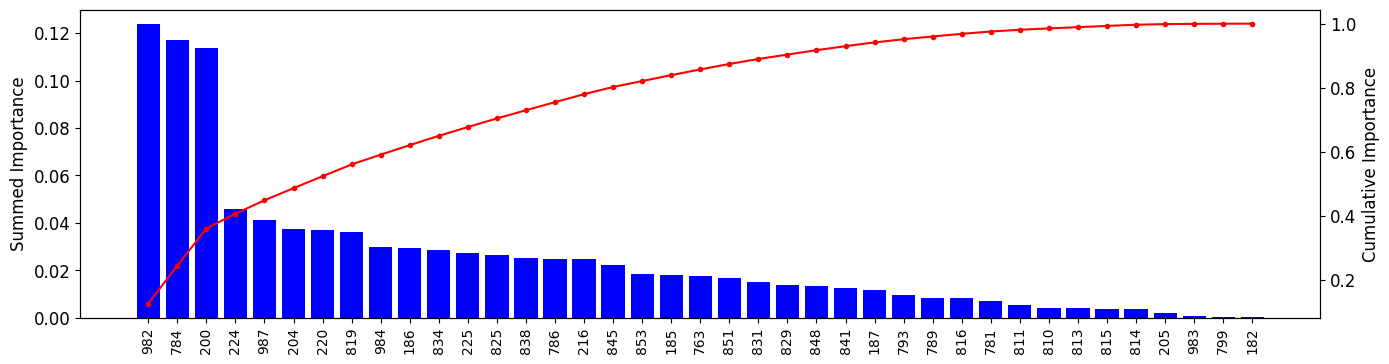

In [6]:
# Perform feature selection on data
msa.select_features(n_estimators=10000, random_state=42, plot=True)

In [14]:
# Calculate cumulative sum of importance
cumulative_importance = np.cumsum(msa.sorted_importance) / np.sum(msa.sorted_importance)
# Find the index where cumulative importance exceeds or equals 0.9
index = np.where(cumulative_importance >= 0.9)[0][0]
# Get the values from sorted_features up to the index
selected_columns = msa.sorted_importance.index[:index + 1].values
# Filter the selected features to get the most important residues
print(selected_columns[:3])

[982 784 200]


In [26]:
weights = msa.henikoff(msa.data)
weights

0       0.011941
1       0.014395
2       0.012363
3       0.012912
4       0.014484
          ...   
7562    0.014950
7564    0.015550
7565    0.016098
7566    0.016960
7567    0.015597
Length: 6469, dtype: float64

In [28]:
len(weights), len(msa.data)

(6469, 6469)

In [35]:
profiles = []
for idx, row in msa.data[selected_columns[:3]].iterrows():
    profiles.append((idx, *sorted(row.items(), key=lambda x: x[0])))
profiles

[(0, (200, 'E'), (784, 'N'), (982, 'E')),
 (1, (200, 'D'), (784, 'R'), (982, 'D')),
 (2, (200, 'E'), (784, 'H'), (982, 'E')),
 (3, (200, 'D'), (784, 'N'), (982, 'E')),
 (4, (200, 'E'), (784, 'W'), (982, 'Q')),
 (5, (200, 'G'), (784, 'L'), (982, 'D')),
 (6, (200, 'D'), (784, 'N'), (982, '-')),
 (7, (200, 'E'), (784, 'L'), (982, 'E')),
 (8, (200, 'E'), (784, 'M'), (982, 'E')),
 (9, (200, 'E'), (784, 'F'), (982, 'E')),
 (10, (200, 'E'), (784, 'F'), (982, 'Q')),
 (11, (200, 'E'), (784, 'F'), (982, 'E')),
 (12, (200, 'D'), (784, 'N'), (982, 'E')),
 (13, (200, 'E'), (784, 'N'), (982, 'E')),
 (14, (200, 'E'), (784, 'F'), (982, 'E')),
 (15, (200, 'D'), (784, 'R'), (982, 'D')),
 (16, (200, 'E'), (784, 'Y'), (982, 'E')),
 (17, (200, 'E'), (784, 'F'), (982, 'Q')),
 (18, (200, 'E'), (784, 'L'), (982, 'Q')),
 (19, (200, 'G'), (784, 'T'), (982, 'D')),
 (20, (200, 'D'), (784, 'M'), (982, 'E')),
 (21, (200, 'E'), (784, 'S'), (982, 'E')),
 (22, (200, 'D'), (784, 'F'), (982, 'E')),
 (23, (200, 'E'), (78

In [43]:
[', '.join([seq3(aa)+str(col) for col, aa in profile[1:]]) for profile in profiles]

['Glu200, Asn784, Glu982',
 'Asp200, Arg784, Asp982',
 'Glu200, His784, Glu982',
 'Asp200, Asn784, Glu982',
 'Glu200, Trp784, Gln982',
 'Gly200, Leu784, Asp982',
 'Asp200, Asn784, Xaa982',
 'Glu200, Leu784, Glu982',
 'Glu200, Met784, Glu982',
 'Glu200, Phe784, Glu982',
 'Glu200, Phe784, Gln982',
 'Glu200, Phe784, Glu982',
 'Asp200, Asn784, Glu982',
 'Glu200, Asn784, Glu982',
 'Glu200, Phe784, Glu982',
 'Asp200, Arg784, Asp982',
 'Glu200, Tyr784, Glu982',
 'Glu200, Phe784, Gln982',
 'Glu200, Leu784, Gln982',
 'Gly200, Thr784, Asp982',
 'Asp200, Met784, Glu982',
 'Glu200, Ser784, Glu982',
 'Asp200, Phe784, Glu982',
 'Glu200, Tyr784, Gln982',
 'Glu200, Ile784, Glu982',
 'Glu200, Phe784, Gln982',
 'Asp200, Arg784, Asp982',
 'Gly200, Lys784, Asp982',
 'Asp200, Arg784, Asp982',
 'Glu200, Ala784, Glu982',
 'Glu200, Phe784, Gln982',
 'Ser200, Arg784, Asp982',
 'Glu200, Leu784, Glu982',
 'Glu200, Met784, Gln982',
 'Glu200, Ser784, Glu982',
 'Glu200, Phe784, Gln982',
 'Glu200, Leu784, Glu982',
 

In [44]:
len(profiles), len({', '.join([seq3(aa)+str(col) for col, aa in profile[1:]]) for profile in profiles})

(6469, 118)

In [8]:
selected_columns = (200, 784, 982)
profiles = []
for row_idx, row in msa.data.iterrows():
    profile = []
    # for index, value in zip(row.index, row.values):
    #     print(index, value)
    for col in selected_columns:
        profile.append(row.loc[col])
    profiles.append(profile)
profiles

[['E', 'N', 'E'],
 ['D', 'R', 'D'],
 ['E', 'H', 'E'],
 ['D', 'N', 'E'],
 ['E', 'W', 'Q'],
 ['G', 'L', 'D'],
 ['D', 'N', '-'],
 ['E', 'L', 'E'],
 ['E', 'M', 'E'],
 ['E', 'F', 'E'],
 ['E', 'F', 'Q'],
 ['E', 'F', 'E'],
 ['D', 'N', 'E'],
 ['E', 'N', 'E'],
 ['E', 'F', 'E'],
 ['D', 'R', 'D'],
 ['E', 'Y', 'E'],
 ['E', 'F', 'Q'],
 ['E', 'L', 'Q'],
 ['G', 'T', 'D'],
 ['D', 'M', 'E'],
 ['E', 'S', 'E'],
 ['D', 'F', 'E'],
 ['E', 'Y', 'Q'],
 ['E', 'I', 'E'],
 ['E', 'F', 'Q'],
 ['D', 'R', 'D'],
 ['G', 'K', 'D'],
 ['D', 'R', 'D'],
 ['E', 'A', 'E'],
 ['E', 'F', 'Q'],
 ['S', 'R', 'D'],
 ['E', 'L', 'E'],
 ['E', 'M', 'Q'],
 ['E', 'S', 'E'],
 ['E', 'F', 'Q'],
 ['E', 'L', 'E'],
 ['E', 'Q', 'E'],
 ['G', 'R', 'D'],
 ['E', 'S', 'E'],
 ['E', 'Y', 'Q'],
 ['E', 'Y', 'Q'],
 ['E', 'F', 'Q'],
 ['E', 'N', 'E'],
 ['E', 'Q', 'E'],
 ['D', 'R', 'D'],
 ['E', 'Y', 'Q'],
 ['D', 'M', 'D'],
 ['E', 'H', 'Q'],
 ['E', 'I', 'E'],
 ['E', 'F', 'Q'],
 ['E', 'H', 'Q'],
 ['D', 'R', 'D'],
 ['E', 'F', 'Q'],
 ['E', 'W', 'E'],
 ['D', 'R'

In [ ]:
specific_row = msa.raw_data.loc['BPHA1_RHOJR/174-441']
pos_map, count = {}, 0
for index, value in zip(specific_row.index, specific_row.values):
    print(f"Index: {index}, Value: {value}")
